In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ohud\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
import re
import pandas as pd
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

# تحميل البيانات من جديد
dataset = load_dataset("KFUPM-JRCAI/arabic-generated-abstracts")

# اختيار مجموعة كمثال
df = dataset["by_polishing"].to_pandas()

# قائمة stopwords (من NLTK)
arabic_stopwords = set(stopwords.words('arabic'))

# تهيئة stemmer
stemmer = ISRIStemmer()

# دالة لتنظيف النصوص
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # 1. إزالة التشكيل
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)
    # 2. تطبيع الألف (أ → ا) والياء (ى → ي)
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ئ', 'ي', text)
    # 3. إزالة الرموز غير العربية
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    # 4. إزالة stopwords
    words = [w for w in text.split() if w not in arabic_stopwords]
    # 5. stemming
    words = [stemmer.stem(w) for w in words]
    return " ".join(words)

# تجربة على أول نص
sample = df["original_abstract"].iloc[0]
print(" النص الأصلي:\n", sample)
print("\n بعد التنظيف:\n", preprocess_text(sample))


 النص الأصلي:
 كثيرا ما ارتبطت المصادر التاريخية في الأندلس خاصة منها كتب التراجم والفهرسات والبرامج وغيرها بدراسة حياة العلماء والرواة والقضاة والساسة ؛ وقد تطورت هذه المادة حتى ترك لنا المؤلفون الأندلسيون سلسلة متواصلة الحلقات من كتب التـراجم كالصلة لابن بشكوال ، وصلة الصلة لابن الزبير، والتكملة لكتاب الصلة لابن الآبار، والذيل والتكملة لكتابي الموصول والصلة لابن عبد الملك المراكشي إضافة إلى الإحاطة في أخبار غرناطة لابن الخطيب ، إلا أنها لم تنس أن تشير في ثنايا أو بالأحرى في خواتم هذه المؤلفات إلى فئة المرأة العالمة التي ساهمت في الإنتاج الفكري والحضاري الأندلسي. ومن خلالها سنسعى إلى الوقوف على حالة التعليم عند المرأة الأندلسية ، وكيف كانت تأخذ فنون العلم. وما مدى إسهامها في الفكر التربوي والإنتاج الفكري الأندلسيين ؟.

 بعد التنظيف:
 ربط صدر ارخ دلس كتب رجم هرس رمج وغر درس حية علماء روة قضة سسة ؛ وقد تطر ادة حتي ولف دلس لسل واصل حلق كتب ـرجم صلة لبن شكوال ، وصل صلة لبن زبير، كمل كتب صلة لبن بر، ذيل كمل كتب وصل صلة لبن عبد ملك ركش ضفة الي حطة خبر غرناط لبن خطب ، الا انه تنس ان تشر ثنا 

In [10]:
!pip install wordcloud

In [21]:
pip install arabic-reshaper python-bidi

C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65165 (\N{ARABIC LETTER ALEF ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65201 (\N{ARABIC LETTER SEEN ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65197 (\N{ARABIC LETTER REH ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65193 (\N{ARABIC LETTER DAL ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPytho

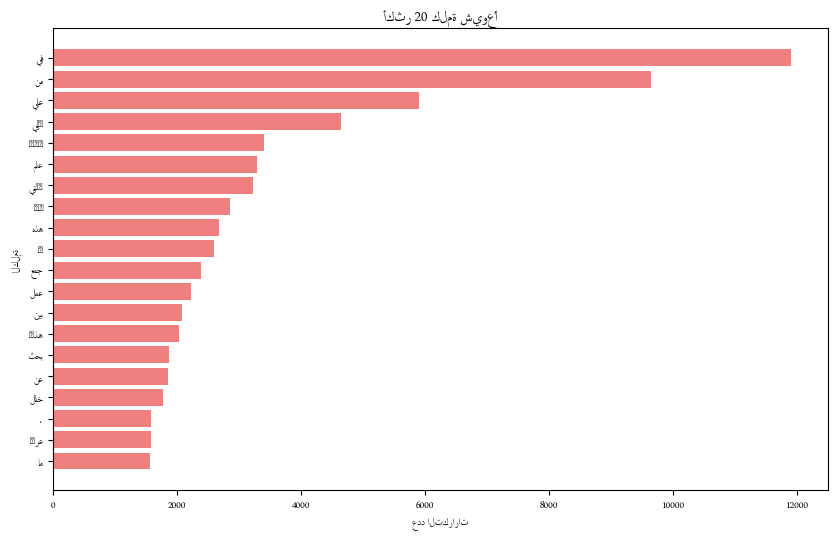

C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65253 (\N{ARABIC LETTER NOON ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65165 (\N{ARABIC LETTER ALEF ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65233 (\N{ARABIC LETTER FEH ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65201 (\N{ARABIC LETTER SEEN ISOLATED FORM}) missing from font(s) Arabic Typesetting.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ohud\AppData\Local\anaconda3\Lib\site-packages\IPyth

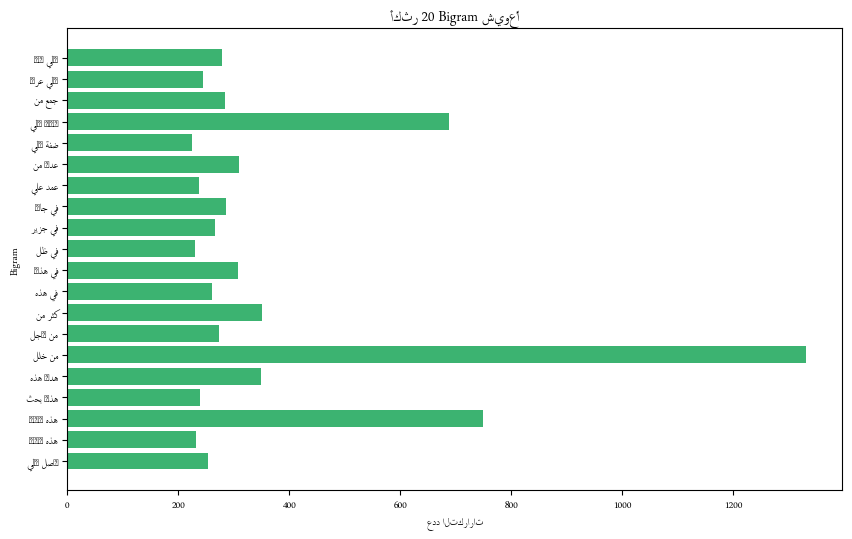

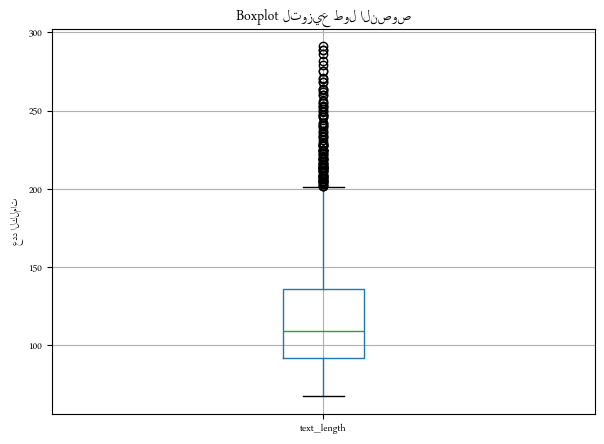

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import arabic_reshaper
from bidi.algorithm import get_display

# -------------------------------------------------------
# 1️⃣ Bar Chart لأكثر 20 كلمة شيوعًا
all_words = " ".join(df["clean_text"].dropna().astype(str)).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

# إعادة تشكيل الكلمات العربية
reshaped_words = [get_display(arabic_reshaper.reshape(w)) for w in words]

plt.figure(figsize=(10,6))
plt.barh(reshaped_words, counts, color="lightcoral")
plt.xlabel("عدد التكرارات")
plt.ylabel("الكلمة")
plt.title("أكثر 20 كلمة شيوعًا", fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# -------------------------------------------------------
# 2️⃣ Bar Chart لأكثر 20 Bigram شيوعًا
texts = df["clean_text"].dropna().astype(str)
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=20)
X = vectorizer.fit_transform(texts)

bigrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# إعادة تشكيل الـ bigrams العربية
reshaped_bigrams = [get_display(arabic_reshaper.reshape(bg)) for bg in bigrams]

plt.figure(figsize=(10,6))
plt.barh(reshaped_bigrams, counts, color="mediumseagreen")
plt.xlabel("عدد التكرارات")
plt.ylabel("Bigram")
plt.title("أكثر 20 Bigram شيوعًا", fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# -------------------------------------------------------
# 3️⃣ Boxplot لتوزيع طول النصوص
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(7,5))
df.boxplot(column="text_length")
plt.title("Boxplot لتوزيع طول النصوص", fontsize=14)
plt.ylabel("عدد الكلمات")
plt.show()
